In [98]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import xarray as xr
from netCDF4 import Dataset

from scipy.signal import fftconvolve
import glob, os, sys
from matplotlib.colors import LogNorm


from skimage import data, draw
from skimage.feature import masked_register_translation
from scipy import ndimage as ndi
import datetime

from scipy import stats


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
dset = xr.load_dataset('../../csapr2_500m_advection_full_campaign.nc')

In [100]:
x = dset['x'][:]
y = dset['y'][:]
magnitude = dset['magnitude'][:]
direction = dset['direction'][:]
time = dset['basetime'][:]

Text(0, 0.5, 'Magnitude (km/step)')

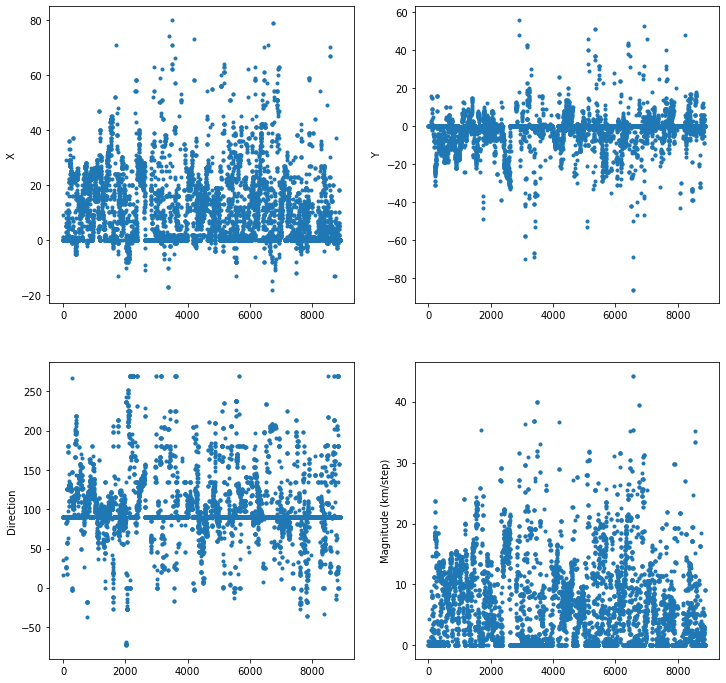

In [101]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(x, '.')
plt.ylabel('X')
plt.subplot(2,2,2)
plt.plot(y, '.')
plt.ylabel('Y')
plt.subplot(2,2,3)
plt.plot(direction, '.')
plt.ylabel('Direction')
plt.subplot(2,2,4)
plt.plot(magnitude, '.')
plt.ylabel('Magnitude (km/step)')

Text(0.5, 0, 'Magnitude (km/step) (Same as mps/1.1')

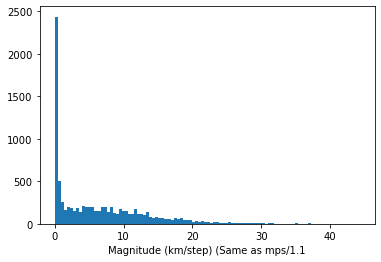

In [102]:
plt.hist(magnitude, bins=100, log=False);
plt.xlabel('Magnitude (km/step) (Same as mps/1.1')

Text(0.5, 0, 'Direction')

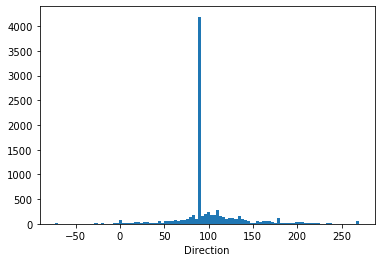

In [103]:
plt.hist(direction, bins=100, log=False);
plt.xlabel('Direction')

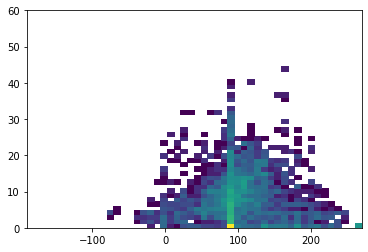

In [104]:
plt.hist2d(direction, magnitude, bins=(50,50), range=((-190, 270),(0,60)), norm=LogNorm());

In [105]:
bin_means, bin_edges, binnumber = stats.binned_statistic(direction, magnitude, 'median', bins=60)

Text(0, 0.5, 'Magnitude')

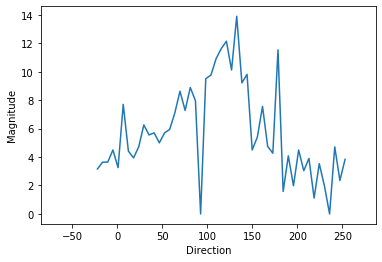

In [106]:
plt.plot(bin_edges[1:], bin_means)
plt.xlabel('Direction')
plt.ylabel('Magnitude')

In [114]:
np.sum(np.isnan(x))

<xarray.DataArray 'x' ()>
array(0)

Text(0.5, 0, 'y - MASKED(nomask)')

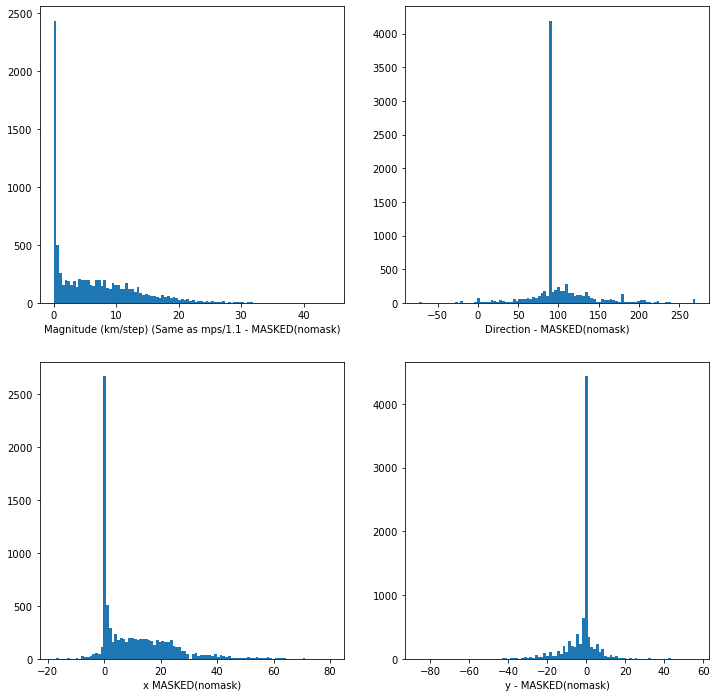

In [115]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.hist(magnitude, bins=100, log=False);
plt.xlabel('Magnitude (km/step) (Same as mps/1.1 - MASKED(nomask)')

plt.subplot(2,2,2)
plt.hist(direction, bins=100, log=False);
plt.xlabel('Direction - MASKED(nomask)')

plt.subplot(2,2,3)
plt.hist(x, bins=100, log=False);
plt.xlabel('x MASKED(nomask)')

plt.subplot(2,2,4)
plt.hist(y, bins=100, log=False);
plt.xlabel('y - MASKED(nomask)')

In [108]:
# mask = np.logical_and(direction>89 , direction < 91)
mask_mag = magnitude > 2
mask_dir = np.logical_and(direction>89.5 , direction < 90.5)


Text(0.5, 0, 'Direction - MASKED(direction~=90)')

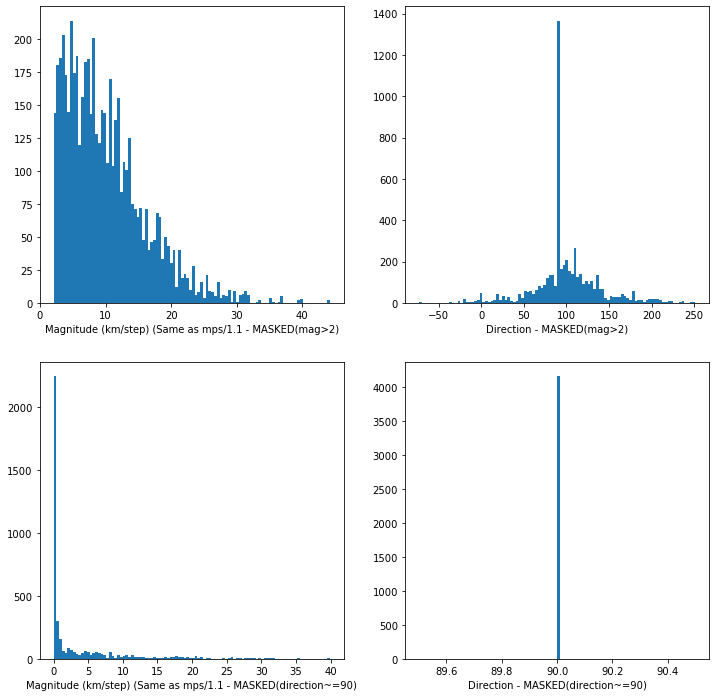

In [109]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.hist(magnitude[mask_mag], bins=100, log=False);
plt.xlabel('Magnitude (km/step) (Same as mps/1.1 - MASKED(mag>2)')

plt.subplot(2,2,2)
plt.hist(direction[mask_mag], bins=100, log=False);
plt.xlabel('Direction - MASKED(mag>2)')

plt.subplot(2,2,3)
plt.hist(magnitude[mask_dir], bins=100, log=False);
plt.xlabel('Magnitude (km/step) (Same as mps/1.1 - MASKED(direction~=90)')

plt.subplot(2,2,4)
plt.hist(direction[mask_dir], bins=100, log=False);
plt.xlabel('Direction - MASKED(direction~=90)')

Text(0.5, 0, 'y - MASKED(direction~=90)')

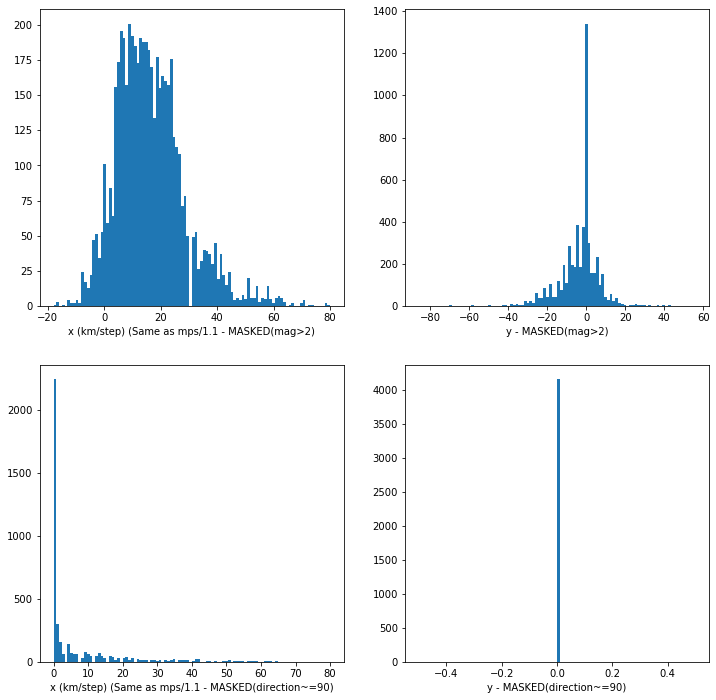

In [110]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.hist(x[mask_mag], bins=100, log=False);
plt.xlabel('x (km/step) (Same as mps/1.1 - MASKED(mag>2)')

plt.subplot(2,2,2)
plt.hist(y[mask_mag], bins=100, log=False);
plt.xlabel('y - MASKED(mag>2)')

plt.subplot(2,2,3)
plt.hist(x[mask_dir], bins=100, log=False);
plt.xlabel('x (km/step) (Same as mps/1.1 - MASKED(direction~=90)')

plt.subplot(2,2,4)
plt.hist(y[mask_dir], bins=100, log=False);
plt.xlabel('y - MASKED(direction~=90)')

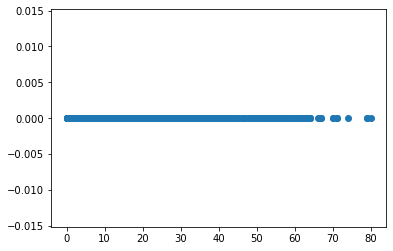

In [111]:
plt.scatter(x[mask_dir],y[mask_dir])

In [112]:
90 - np.arctan2(y[mask_dir], x[mask_dir]) * 180 / np.pi

<xarray.DataArray (time: 4161)>
array([90., 90., 90., ..., 90., 90., 90.])
Dimensions without coordinates: time

In [97]:
dset.close()